Import Necessary libraries

In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [139]:
data = pd.read_excel('G:\\ML_project\\Data\\flight fare.xlsx')

In [140]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [141]:
data.shape

(10683, 11)

In [142]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [144]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [145]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [146]:
data.dropna(inplace=True)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [147]:
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [148]:
data.drop_duplicates(keep='first',inplace=True)
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [149]:
data.shape

(10462, 11)

In [150]:
data['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Check the different column name

In [151]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

check the diffrent route

In [152]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

Data Visualization

Plotting Price vs Airline plot

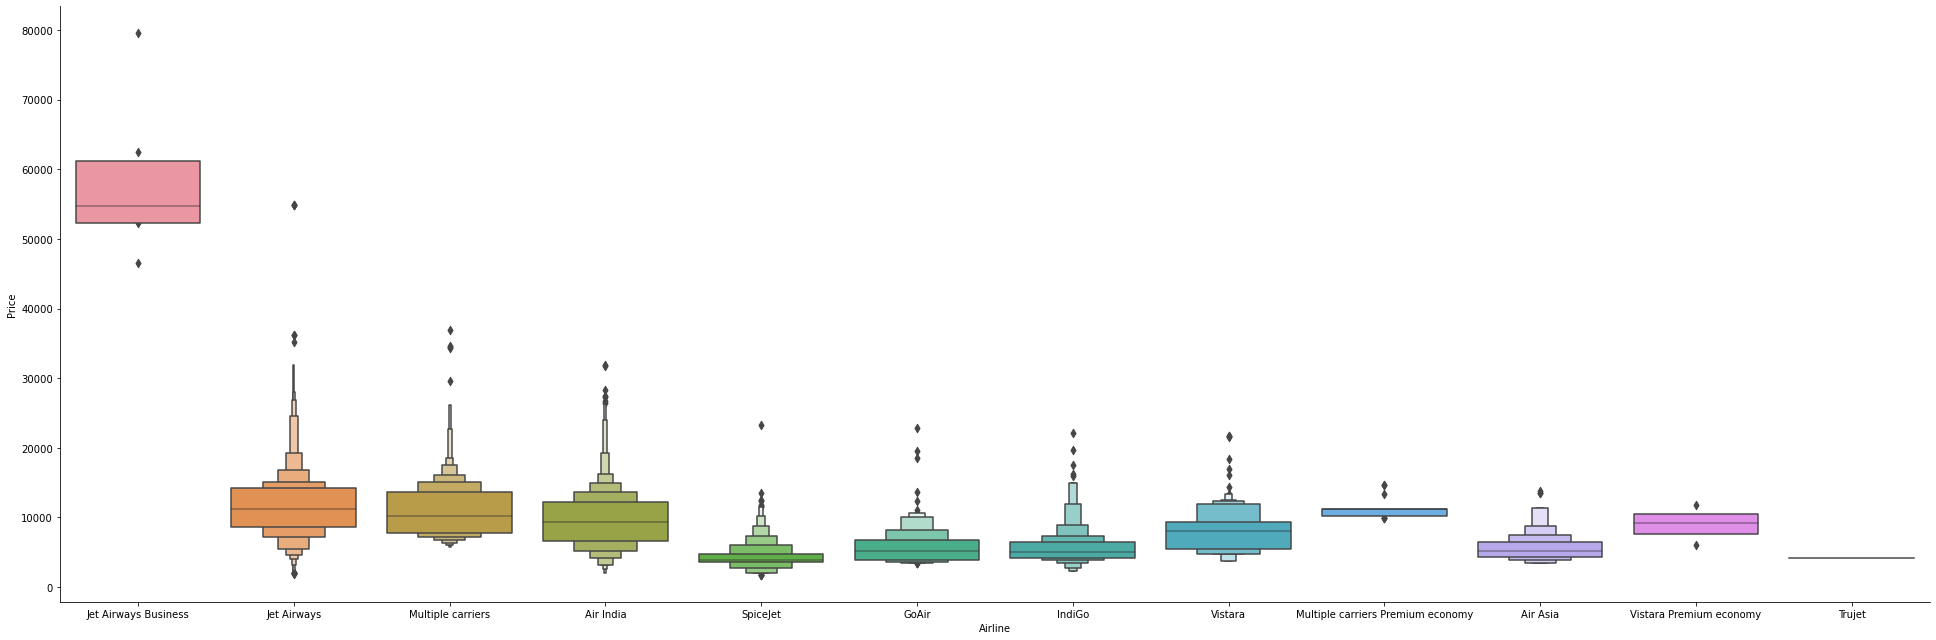

In [153]:
sns.catplot(data = data.sort_values("Price",ascending=False),x = 'Airline',y = 'Price',kind="boxen",height=9,aspect= 3)
plt.show()

Plotting Violin plot for Price vs Source

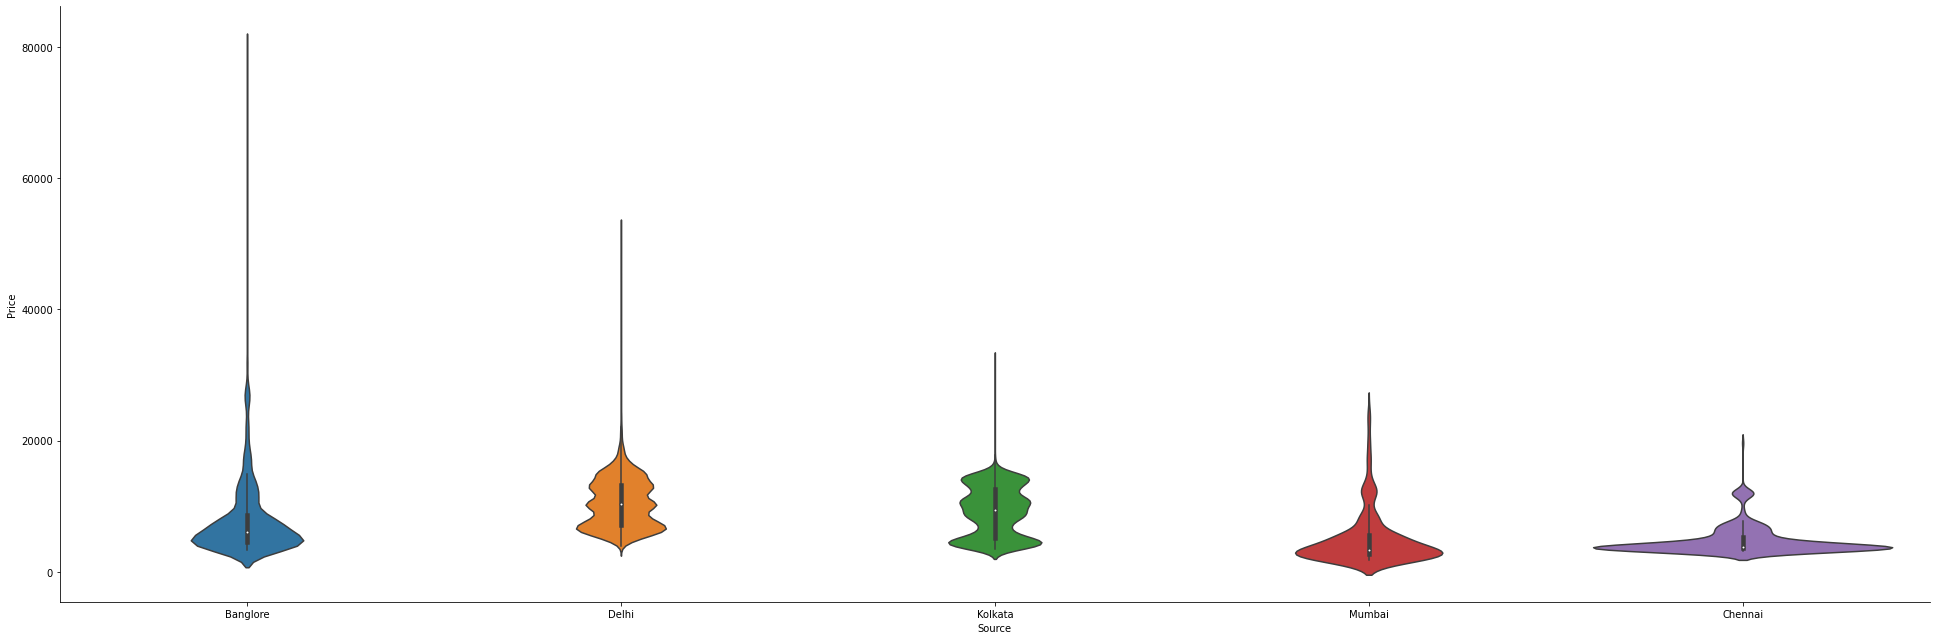

In [154]:
sns.catplot(data=data.sort_values(ascending=False,by="Price"),x="Source",y="Price",kind='violin',height=9,aspect=3)
plt.show()

plotting Box plot for price vs Destination

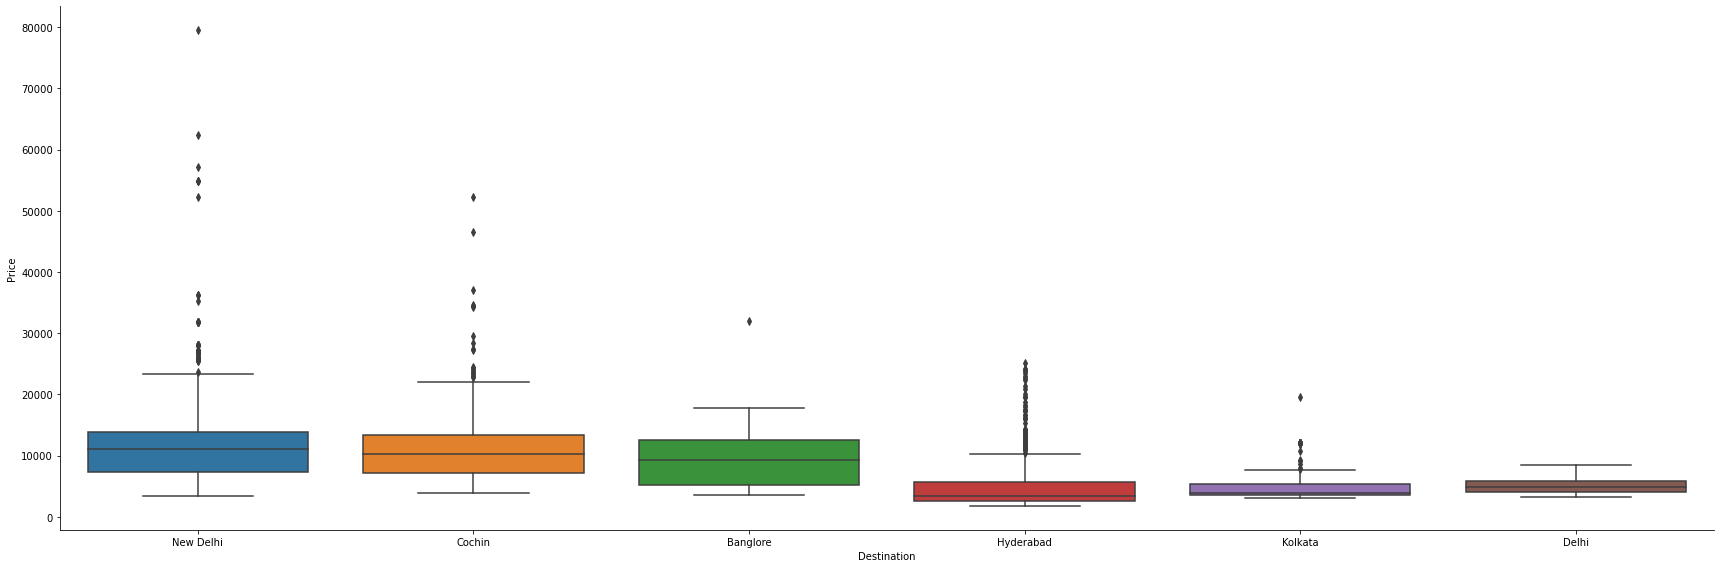

In [155]:
sns.catplot(data=data.sort_values(ascending=False,by='Price'),x='Destination',y='Price',kind='box',height=8,aspect=3)
plt.show()

In [156]:
data['Duration'] = data['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [157]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882


In [158]:
data['journey_day']= data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['journey_month'] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [159]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5


In [160]:
data['Dep_hour']= pd.to_datetime(data["Dep_Time"]).dt.hour
data['Dep_min']= pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(['Dep_Time'],axis=1,inplace=True)

In [161]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50


In [162]:
data['Arrival_hour']= pd.to_datetime(data["Arrival_Time"]).dt.hour
data['Arrival_min']= pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [163]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


Plotting Bar chart for Months(Duration) vs Number of Flights

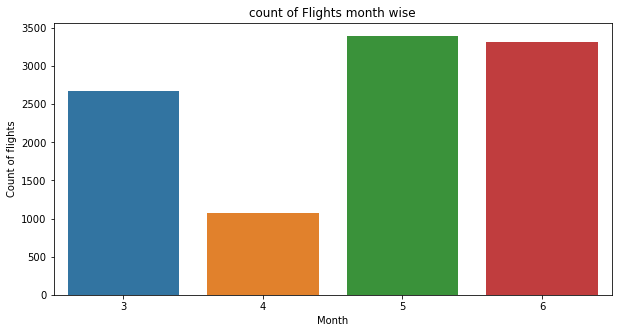

In [164]:
plt.figure(figsize=(10,5))
plt.title("count of Flights month wise")
ax = sns.countplot(x='journey_month',data=data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.show()

Plotting Bar CHart for types of Airline vs Number of Flights

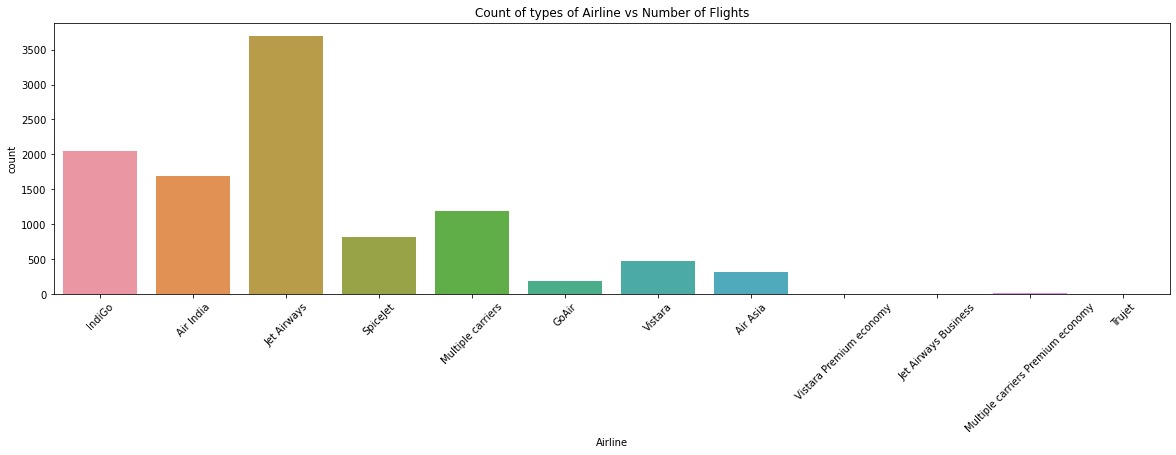

In [165]:
plt.figure(figsize=(20,5))
plt.title('Count of types of Airline vs Number of Flights')
plt.xlabel("Airline")
plt.ylabel('Count of Flights')
plt.xticks(rotation=45)
sns.countplot(data=data,x='Airline')
plt.show()

plotting Ticket Prices VS Airlines

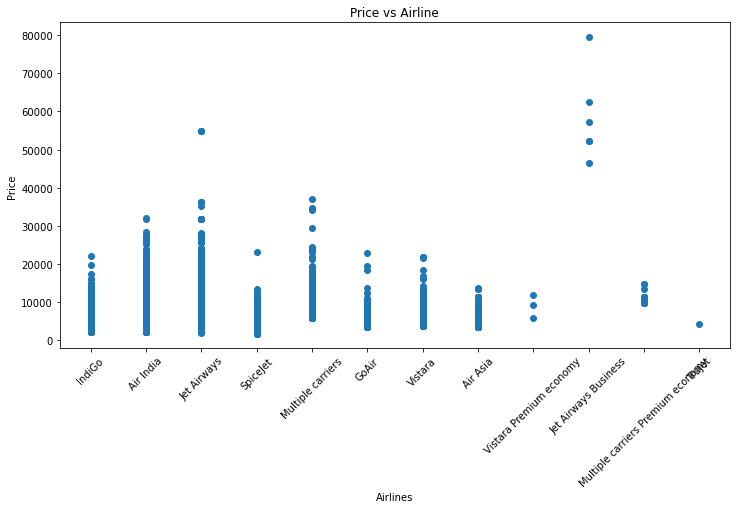

In [166]:
plt.figure(figsize=(12,6))
plt.title('Price vs Airline')
plt.xlabel("Airlines")
plt.ylabel("Price")
plt.scatter(x=data['Airline'],y=data['Price'])
plt.xticks(rotation=45)
plt.show()

Corralation between all Features

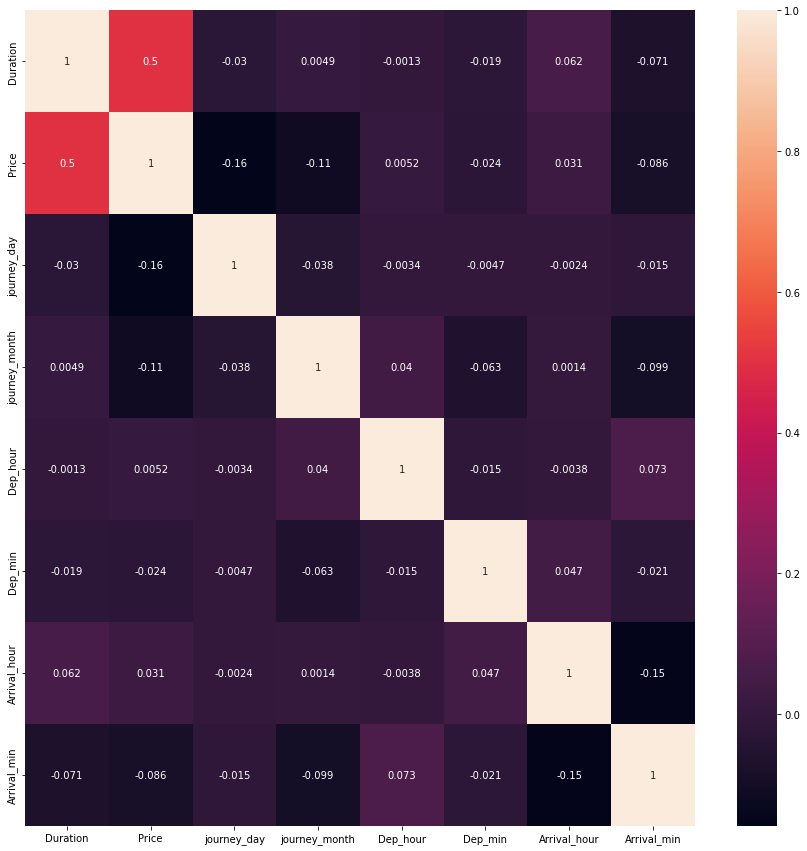

In [167]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [168]:
train_data = data.drop(['Price'],axis=1)

In [169]:
categorical_data = train_data.select_dtypes(exclude=['int64','float','int32'])
numerical_data = train_data.select_dtypes(include=['int64','float','int32'])
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [170]:
numerical_data.head()

,Duration,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,24,3,22,20,1,10
1,445,1,5,5,50,13,15
2,1140,9,6,9,25,4,25
3,325,12,5,18,5,23,30
4,285,1,3,16,50,21,35


In [171]:
X = pd.concat([categorical_data,numerical_data],axis=1)
y= data['Price']
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,170,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,445,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,1140,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,325,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,285,1,3,16,50,21,35


In [172]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [173]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [174]:
le = LabelEncoder()
categorical_data = categorical_data.apply(le.fit_transform)

In [175]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


In [176]:
X = pd.concat([categorical_data,numerical_data],axis=1)
y= data['Price']
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


Now we will be splitting our Data

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [178]:
print("The size of training input: ",X_train.shape)
print("The size of training output: ",y_train.shape)
print("The size of testing input: ",X_test.shape)
print("The size of training output: ",y_test.shape)

The size of training input:  (7009, 13)
The size of training output:  (7009,)
The size of testing input:  (3453, 13)
The size of training output:  (3453,)


In [179]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Model Building

1. Ridge Regression

In [180]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_reg = GridSearchCV(Ridge(),cv=5,n_jobs=-1,param_grid=params,scoring='neg_mean_absolute_error')
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [181]:
y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)

In [182]:
print(y_train_pred)
print(y_test_pred)

[13890.39186631  4730.77026874 11666.13618437 ... 12078.68473309
 10566.16455764 11760.28794297]
[10667.26584795  9876.8352573   9255.52484659 ... 12008.68893042
 11040.7394614   6053.28333641]


In [183]:
y_train_pred.shape

(7009,)

In [184]:
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [185]:
print("Train Result for Ridge Regressor Model: ")
print("Root Mean square error: ",sqrt(mean_squared_error(y_pred=y_train_pred,y_true=y_train)))
print("Mean Absolute % error ",round(mean_absolute_percentage_error(y_pred=y_train_pred,y_true=y_train)*100,2))
print("R-squared ",r2_score(y_pred=y_train_pred,y_true=y_train))

Train Result for Ridge Regressor Model: 
Root Mean square error:  3539.4019708397714
Mean Absolute % error  31.83
R-squared  0.4162308043777486


In [186]:
print("Test Result for Ridge Regressor Model: ")
print("Root Mean square error: ",sqrt(mean_squared_error(y_pred=y_test_pred,y_true=y_test)))
print("Mean Absolute % error ",round(mean_absolute_percentage_error(y_pred=y_test_pred,y_true=y_test)*100,2))
print("R-squared ",r2_score(y_pred=y_train_pred,y_true=y_train))

Test Result for Ridge Regressor Model: 
Root Mean square error:  3507.524114992108
Mean Absolute % error  32.13
R-squared  0.4162308043777486


2. Lasso Regression

In [187]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_reg = GridSearchCV(Lasso(),cv=15,n_jobs=-1,param_grid=params,scoring='neg_mean_absolute_error')
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [188]:
y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)
print(y_train_pred)
print(y_test_pred)

[13890.39186631  4730.77026874 11666.13618437 ... 12078.68473309
 10566.16455764 11760.28794297]
[10667.26584795  9876.8352573   9255.52484659 ... 12008.68893042
 11040.7394614   6053.28333641]


In [189]:
print("Train Result for Lasso Regressor Model: ")
print("Root Mean square error: ",sqrt(mean_squared_error(y_pred=y_train_pred,y_true=y_train)))
print("Mean Absolute % error ",round(mean_absolute_percentage_error(y_pred=y_train_pred,y_true=y_train)*100,2))
print("R-squared ",r2_score(y_pred=y_train_pred,y_true=y_train))

Train Result for Lasso Regressor Model: 
Root Mean square error:  3539.4019708397714
Mean Absolute % error  31.83
R-squared  0.4162308043777486


In [190]:
print("Test Result for Lasso Regressor Model: ")
print("Root Mean square error: ",sqrt(mean_squared_error(y_pred=y_test_pred,y_true=y_test)))
print("Mean Absolute % error ",round(mean_absolute_percentage_error(y_pred=y_test_pred,y_true=y_test)*100,2))
print("R-squared ",r2_score(y_pred=y_test_pred,y_true=y_test))

Test Result for Lasso Regressor Model: 
Root Mean square error:  3507.524114992108
Mean Absolute % error  32.13
R-squared  0.42078605535793223


3. Decision Tree Regression

In [191]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [192]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [193]:
print("Train Results for decision tree Regressor Model: ")
print("Root Mean square error: ",sqrt(mean_squared_error(y_pred=y_train_pred,y_true=y_train)))
print("Mean Absolute % error ",round(mean_absolute_percentage_error(y_pred=y_train_pred,y_true=y_train)*100,2))
print("R-squared ",r2_score(y_pred=y_train_pred,y_true=y_train))

Train Results for decision tree Regressor Model: 
Root Mean square error:  816.620130058546
Mean Absolute % error  5.15
R-squared  0.968924254206659


In [194]:
print("Test Result for Decision Tree  Regressor Model: ")
print("Root Mean square error: ",sqrt(mean_squared_error(y_pred=y_test_pred,y_true=y_test)))
print("Mean Absolute % error ",round(mean_absolute_percentage_error(y_pred=y_test_pred,y_true=y_test)*100,2))
print("R-squared ",r2_score(y_pred=y_test_pred,y_true=y_test))

Test Result for Decision Tree  Regressor Model: 
Root Mean square error:  1585.3808255088704
Mean Absolute % error  9.12
R-squared  0.8816672709869111


In [195]:
ridge_score = round(ridge_reg.score(X_train,y_train)*100,2)
ridge_score_test = round(ridge_reg.score(X_test,y_test)*100,2)

lasso_score = round(lasso_reg.score(X_train,y_train)*100,2)
lasso_test_score = round(lasso_reg.score(X_test,y_test)*100,2)

decision_score = round(tree.score(X_train,y_train)*100,2)
decision_test_score = round(tree.score(X_test,y_test)*100,2)

In [196]:
models = pd.DataFrame({
    'Model':["Ridge Regression","Lasso Regression","Decision tree Regressor"],
    'Train Score':[ridge_score,lasso_score,decision_score],
    'Test Score':[ridge_score_test,lasso_test_score,decision_test_score]
})
models.sort_values(by='Train Score',ascending=False)

,Model,Train Score,Test Score
2,Decision tree Regressor,96.89,88.17
1,Lasso Regression,-250796.61,-250177.77
0,Ridge Regression,-251169.14,-250949.64


In [197]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [198]:
from prettytable import PrettyTable

In [199]:
a = PrettyTable()

In [200]:
a.field_names= ["Model Name", "Tr. RMSE", "Tr. MA%E", "Tr. R-Squared", "Te. RMSE", "Te. MA%E", "Te. R-Squared",]
a.add_row(['Ridge Regression','3608.7466723248394','31.84','0.40844907611153924','3366.873423796998','32.15','0.40844907611153924'])
a.add_row(['Lasso Rigression','3608.7466723248394','31.84','0.40844907611153924','3366.873423796998','32.15','0.4363555357029839'])
a.add_row(['Decision Tree','736.1307504772965','3.35','0.9753855994250005','1784.358038210157','9.06','0.84168733122682'])
print(x)

+-------------------------+----------+----------+---------------+----------+----------+---------------+
|        Model Name       | Tr. RMSE | Tr. MA%E | Tr. R-Squared | Te. RMSE | Te. MA%E | Te. R-Squared |
+-------------------------+----------+----------+---------------+----------+----------+---------------+
|     Ridge Regression    | 3558.67  |    32    |      0.42     | 3457.60  |    32    |      0.42     |
|     Lasso Regression    | 3560.85  |    32    |      0.41     | 3459.38  |    32    |      0.42     |
| Decision Tree Regressor |  853.54  |    06    |      0.97     | 1857.68  |    10    |      0.83     |
+-------------------------+----------+----------+---------------+----------+----------+---------------+
